# Advance Topics in Digital Image Processing

__Design & Develop__: Mobin Nesari

## 1. Itroduction to Digital Image Processing

Digital Image Processing (DIP) involves the manipulation of digital images using various algorithms and techniques to enhance or extract useful information from images. In this notebook, we will explore some fundamental techniques in DIP, including edge detection, image sharpening, noise reduction, and gradient operations.

## 2. Basics of Image Representation in Python

Let's start by loading and displaying an image using OpenCV, one of the most popular libraries for image processing in Python.

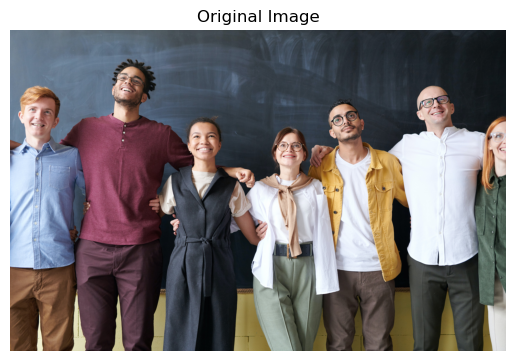

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load an image
image = cv2.imread('image1.jpg')

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.show()


## 3. Edge Detection
Edge detection is a fundamental task in image processing, aiming to identify regions in an image where the intensity changes significantly. We'll demonstrate several edge detection techniques:

### Laplacian Edge Detection
The Laplacian operator calculates the second derivative of the image intensity, enhancing regions with rapid intensity changes.

In [6]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)

### Sobel Edge Detection
The Sobel operator calculates the gradient of the image intensity in both horizontal and vertical directions, highlighting edges.

In [7]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

### Roberts Cross Edge Detection
The Roberts Cross operator calculates the gradient using a pair of 2x2 convolution kernels, emphasizing diagonal edges.

In [ ]:
roberts_cross_x = np.array([[1, 0], [0, -1]])
roberts_cross_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(image, -1, roberts_cross_x)
roberts_y = cv2.filter2D(image, -1, roberts_cross_y)
roberts_combined = cv2.magnitude(roberts_x, roberts_y)

### Prewitt Edge Detection
The Prewitt operator is similar to the Sobel operator, but it uses different convolution kernels to compute gradients.

In [ ]:
prewitt_x = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)

### Canny Edge Detection
The Canny edge detector is a multi-stage algorithm involving gradient calculation, non-maximum suppression, and edge tracking by hysteresis thresholding.

In [10]:
edges_canny = cv2.Canny(image, 100, 200)


These edge detection techniques offer different approaches to identifying edges in images, each with its advantages and applications. Experimentation and selection of the appropriate technique depend on the specific characteristics of the image and the requirements of the application.

## 4. Image Sharpening
Image sharpening techniques enhance the details and edges in an image to improve visual quality. We'll explore several sharpening techniques:

### Laplace Sharpening Filter
The Laplace sharpening filter enhances edges by subtracting a smoothed version of the image from the original.

In [11]:
laplacian_sharpened = cv2.addWeighted(image, 2, cv2.GaussianBlur(image, (0, 0), 3), -1, 0)

### Low Pass Filtering (Smoothing)
Low pass filtering (smoothing) techniques reduce high-frequency noise and details in an image, providing a blurred version of the image.

In [12]:
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

### High Pass Filtering
High pass filtering emphasizes high-frequency components in an image, which correspond to edges and details.

In [13]:
high_pass_filter = cv2.subtract(image, cv2.GaussianBlur(image, (0, 0), 3))

### Filter Sharpening
Filtering-sharpening techniques combine low-pass filtering to smooth the image and high-pass filtering to enhance edges and details.

In [14]:
smoothed = cv2.GaussianBlur(image, (5, 5), 0)
filtering_sharpened = cv2.addWeighted(image, 1.5, smoothed, -0.5, 0)

These image sharpening techniques offer different approaches to enhancing image details and edges, each with its advantages and applications. Experimentation and selection of the appropriate technique depend on the specific characteristics of the image and the desired outcome.

## 5. Introduction to Noise in Images
Noise in images can degrade image quality and affect the performance of image processing algorithms. Here are some common types of noise:
- __Gaussian Noise__: Adds random variation following a Gaussian distribution.
- __Poisson Noise__: Appears in images with low light conditions and is modeled using a Poisson distribution.
- __Salt and Pepper Noise__: Introduces random black and white pixels in the image.
- __Speckle Noise__: Multiplicative noise that appears as graininess or speckles.
- __Periodic Noise__: Occurs as regular patterns or periodic variations in the image intensity.

## 6. Noise Generation and Reduction Techniques
We'll explore various techniques to generate and reduce noise in images:

### Gaussian Noise
Gaussian noise is generated by adding random values sampled from a Gaussian distribution to each pixel in the image.

In [15]:
gaussian_noise = np.random.normal(loc=0, scale=50, size=image.shape).astype(np.uint8)
noisy_image_gaussian = cv2.add(image, gaussian_noise)

### Poisson Noise
Poisson noise is modeled based on the Poisson distribution and typically occurs in images with low light conditions.

In [16]:
noisy_image_poisson = np.random.poisson(image / 255.0 * 100) / 100 * 255

### Salt and Pepper Noise
Salt and pepper noise randomly replaces pixels in the image with either black or white values.

In [17]:
salt_and_pepper_noise = np.zeros_like(image)
salt_and_pepper_noise[np.random.randint(0, image.shape[0], 100), np.random.randint(0, image.shape[1], 100)] = 255
salt_and_pepper_noise[np.random.randint(0, image.shape[0], 100), np.random.randint(0, image.shape[1], 100)] = 0
noisy_image_salt_pepper = cv2.add(image, salt_and_pepper_noise)

### Speckle Noise
Speckle noise is generated by multiplying each pixel in the image by a random Gaussian-distributed value.

In [18]:
speckle_noise = np.random.normal(loc=0, scale=50, size=image.shape).astype(np.uint8)
noisy_image_speckle = image + image * speckle_noise / 255.0

### Periodic Noise
Periodic noise appears as regular patterns or periodic variations in the image intensity, often caused by interference or sensor artifacts.

In [19]:
periodic_noise = np.sin(np.linspace(0, 10, image.size)).reshape(image.shape) * 50
noisy_image_periodic = cv2.add(image, periodic_noise.astype(np.uint8))

These noise generation techniques provide a range of options for introducing different types of noise into digital images, each with its characteristics. Noise reduction techniques, as mentioned earlier, can be used to mitigate the effects of noise on image quality.